In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
df = pd.read_csv('wdbc.data', header=None)
df.shape

(569, 32)

In [155]:
df.describe()

0           2           3           4            5   \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               6           7           8           9           10  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000    0.106000  ...   
25%      0.086370    0.064920    0.029560    0.020310    0.161900  ...   
50%      0.095870    0.092630    0.061540    0.033500    0.179200  ...   
75%      0.105300    0.130400    0.130700    0.074000    0.195700  ...   
max      0.163400    0.345400    0.426800    0.201200    0.304000  ...   

               22          23          24           25          26  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               27          28          29          30          31  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 31 columns]

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [157]:
df[1].replace(to_replace = ['M','B'], value = [1,0], inplace=True)
y = df[1]
y.shape

(569,)

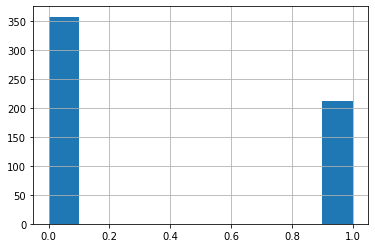

In [158]:
y.hist()

In [159]:
X = df.drop([0,1],axis=1)
X.shape

(569, 30)

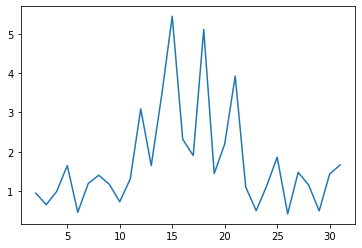

In [160]:
X.skew().plot()

## Part (a)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train.shape, X_test.shape,  y_train.shape,  y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [162]:
parameters = {'max_depth':range(1,8)}
dtree_model = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5)
dtree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 8)})

In [163]:
dtree_model.score(X_train,y_train)

0.9956043956043956

In [164]:
accuracy_DecisionTree = dtree_model.score(X_test,y_test)
accuracy_DecisionTree

0.9385964912280702

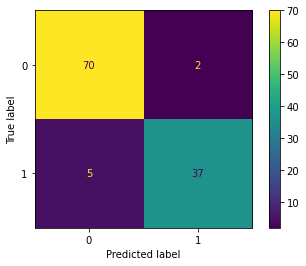

In [165]:
plot_confusion_matrix(dtree_model,X_test, y_test)

In [166]:
rfc=RandomForestClassifier(random_state=42)

In [167]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [168]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [169]:
CV_rfc.score(X_test, y_test)

0.9736842105263158

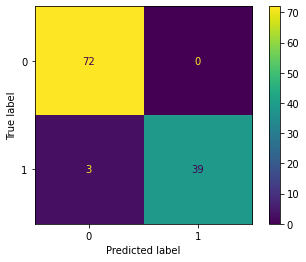

In [170]:
plot_confusion_matrix(CV_rfc,X_test, y_test)

## Part (b)

In [171]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10, 20, 100, 200, 300, 400, 500, 600, 700]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X, y) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 100, 200, 300, 400, 500, 600,
                                          700]})

In [172]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.03571968, 0.08496003, 0.28642054, 0.57570558, 0.85590138,
        1.13937521, 1.40751786, 1.66839108, 1.52594824]),
 'std_fit_time': array([0.00373215, 0.00598535, 0.00818676, 0.01293929, 0.00877402,
        0.00999438, 0.02215886, 0.01370128, 0.19436753]),
 'mean_score_time': array([0.00652199, 0.00686426, 0.01773381, 0.03246331, 0.04336243,
        0.05755959, 0.07233667, 0.08863335, 0.05705395]),
 'std_score_time': array([0.00145194, 0.00108925, 0.00246044, 0.00246199, 0.00092247,
        0.0010968 , 0.00119552, 0.01265821, 0.00509207]),
 'param_n_estimators': masked_array(data=[10, 20, 100, 200, 300, 400, 500, 600, 700],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400},
  {'n_estimators': 500},
 

In [173]:
y = np.array(CV_rfc.cv_results_['mean_test_score'])
x = np.array(param_grid['n_estimators'])

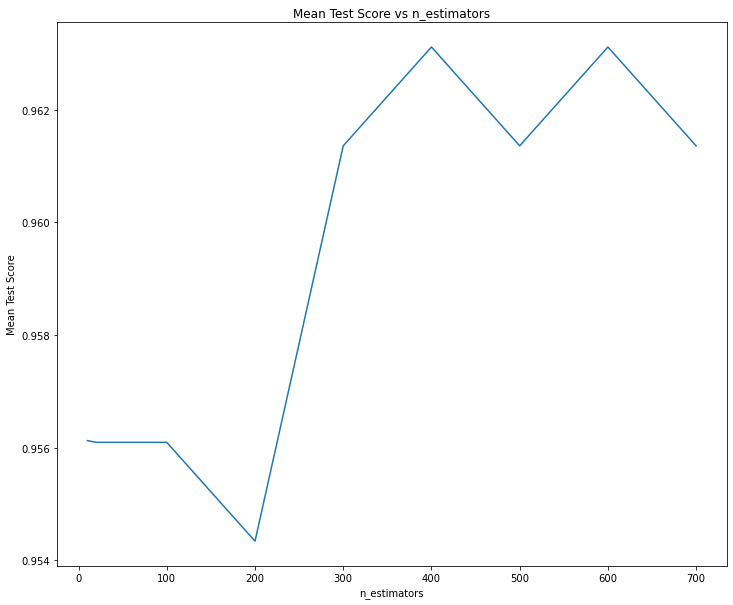

In [174]:
%matplotlib inline
plt.figure(figsize=(12, 10))
plt.plot(x, y)
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs n_estimators')
plt.show()

## Part (c)

In [175]:
y = df[1]
y.shape
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_features': [i for i in range(1,31)]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X, y) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30]})

In [176]:
out = np.array(CV_rfc.cv_results_['mean_test_score'])
inp = np.array(param_grid['max_features'])

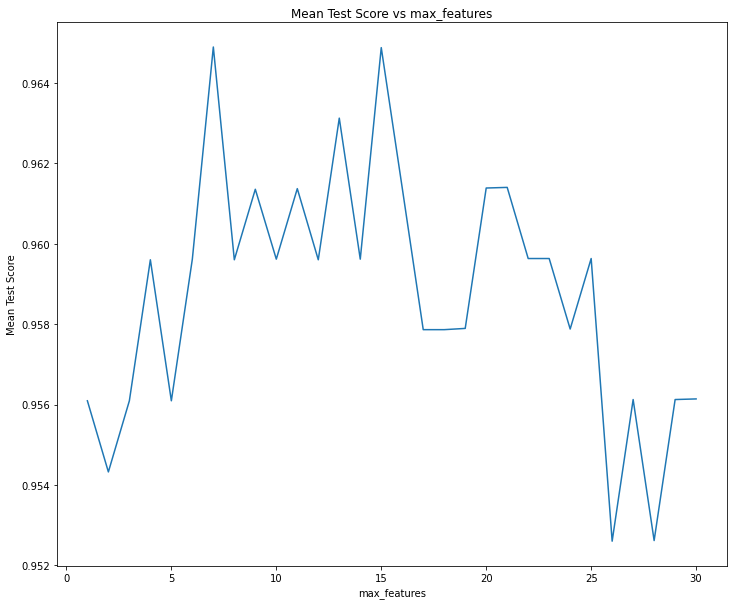

In [177]:
%matplotlib inline
plt.figure(figsize=(12, 10))
plt.plot(inp, out)
plt.xlabel('max_features')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs max_features')
plt.show()